# import the necessary liabrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# load the data set

In [4]:
df=pd.read_csv('customer_booking.csv',encoding='latin1')
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


# check the shape of dataset

In [5]:
df.shape

(50000, 14)

##### number of rows= 50000
##### number of columns= 14

# fetch all column name

In [6]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

# handling null value

In [7]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# fetch the duplicate value

In [54]:
df.duplicated().sum()

719

# Drop duplicate value

In [57]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [60]:
df.shape

(49281, 14)

# check the data type

In [58]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

# fetch the data description

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


# check the statistical behaviuor of data set

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.723281,90.410229,0.00,21.00,51.00,115.00,867.0
length_of_stay,49281.0,23.053976,33.832149,0.00,5.00,17.00,28.00,778.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


# seperate the categorical column and numerical column

In [62]:
cat_col=df.select_dtypes(include='object').columns
num_col=df.select_dtypes(exclude='object').columns
print(cat_col)
print(num_col)

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')
Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')


# visualize the features of cat_col and num_col

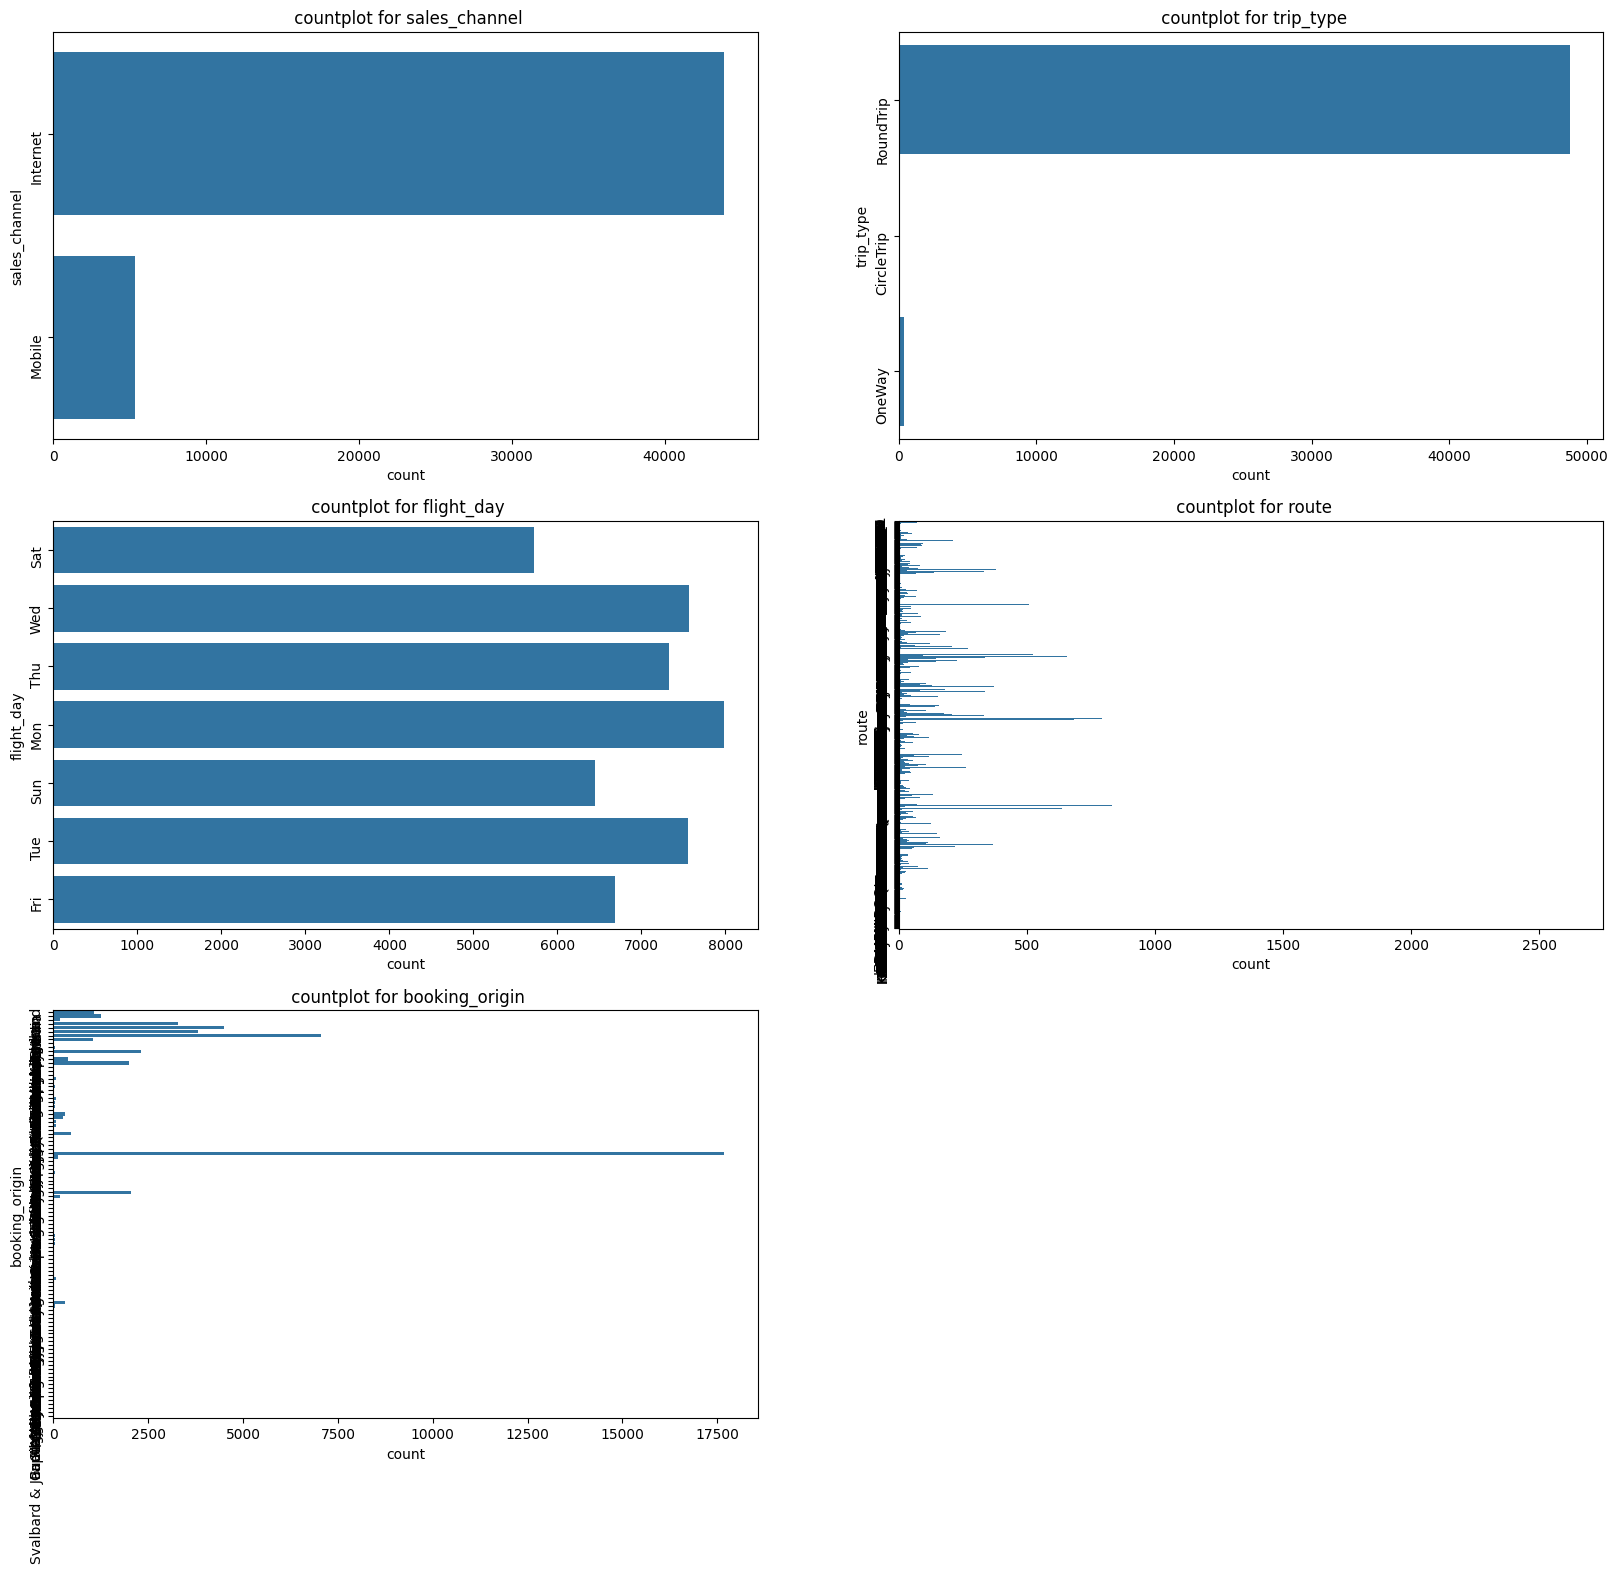

In [63]:
plt.figure(figsize=(20,18))
for i in range(len(cat_col)):
    plt.subplot(3,2,i+1)
    sns.countplot(data=df[cat_col[i]])
    plt.title(f' countplot for {cat_col[i]}')
    plt.yticks(rotation=90)
plt.show()

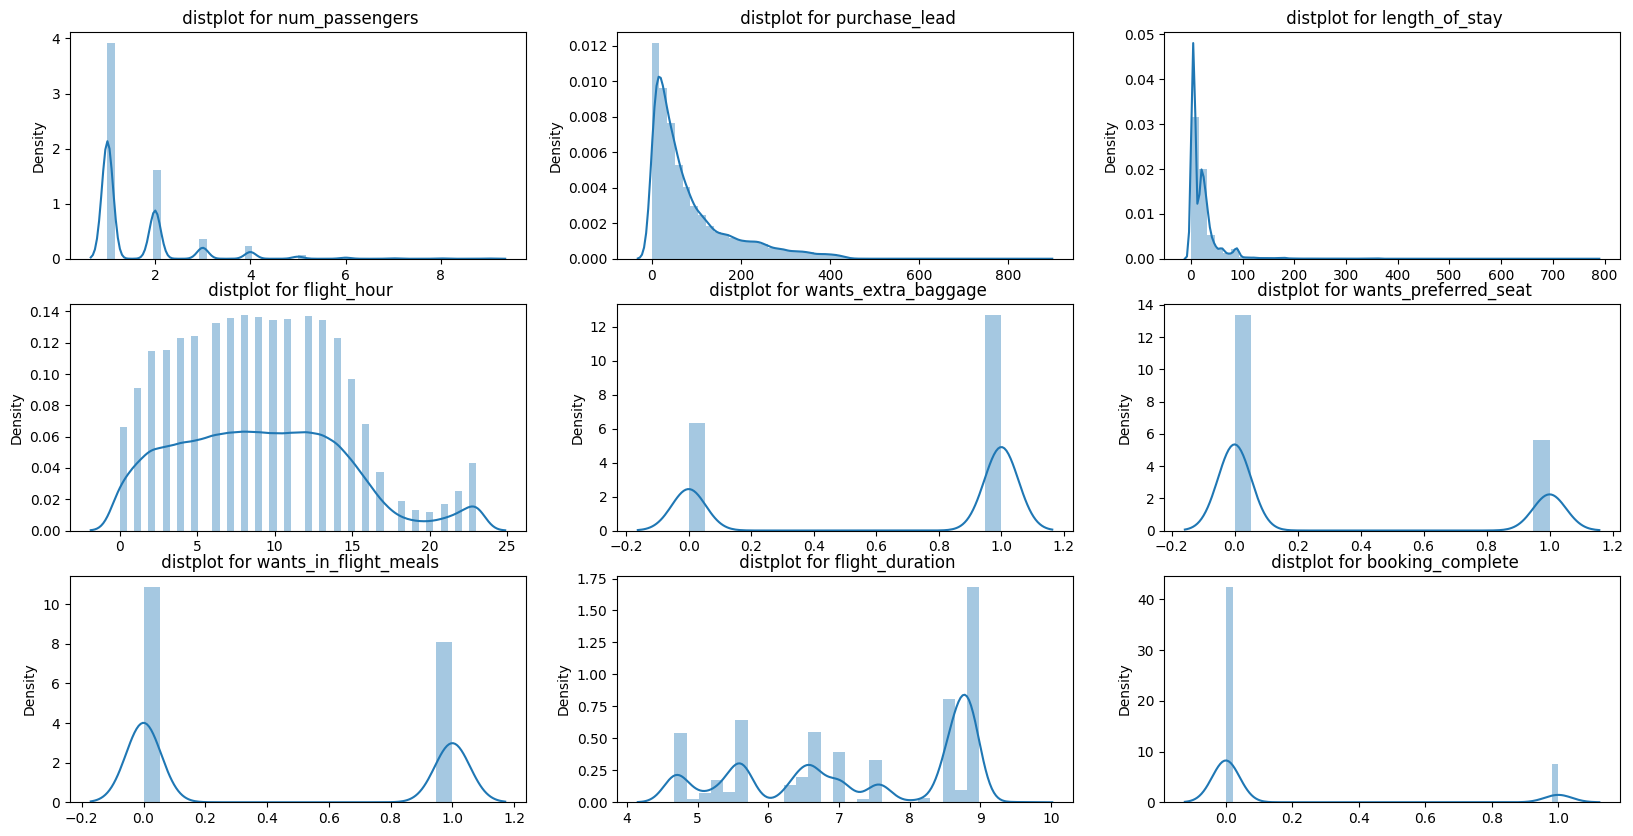

In [64]:
plt.figure(figsize=(20,10))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=df[num_col[i]])
    plt.title(f' distplot for {num_col[i]}')
plt.show()

In [65]:
corr=df[num_col].corr()
corr

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.214999,-0.115380,0.016393,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,-0.010911,0.012251,0.011953,-0.003236,0.006705
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,0.068452,0.050189,0.026399,-0.106529,1.000000


# visualize the correlation using heat map

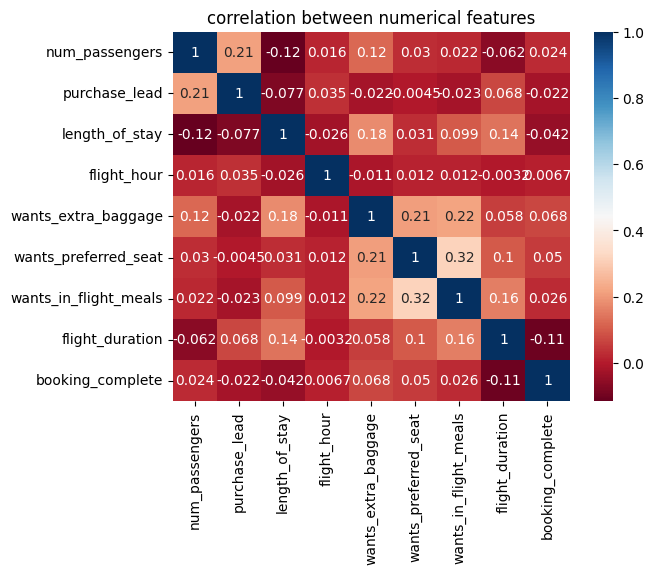

In [66]:
sns.heatmap(data=corr,annot=True,cmap='RdBu')
plt.title('correlation between numerical features')
plt.show()

# outliers treatment

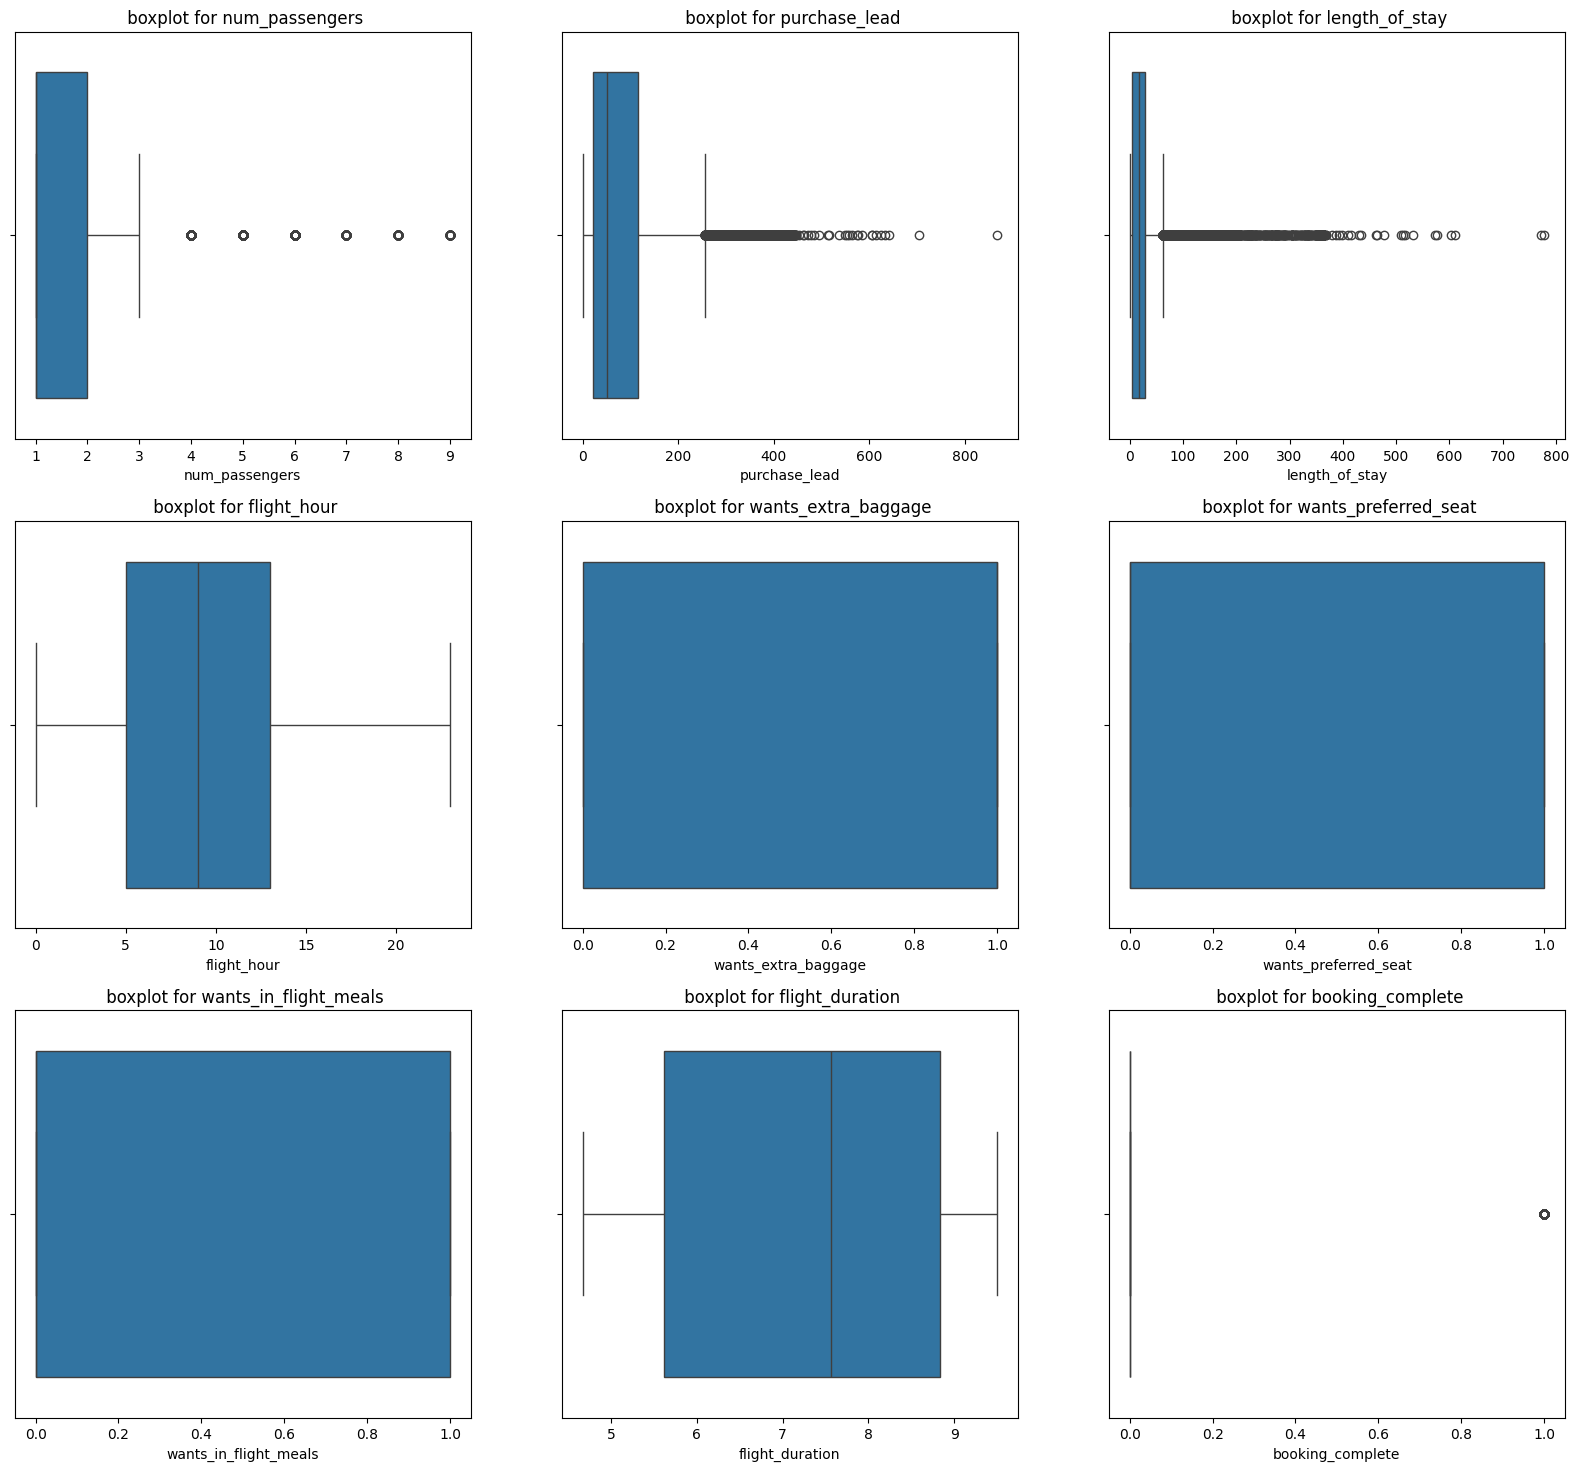

In [67]:
plt.figure(figsize=(20,18))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.title(f' boxplot for {num_col[i]}')
plt.show()

In [71]:
col=['num_passengers', 'purchase_lead', 'length_of_stay']
a=df[col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
num_passengers,49281.0,1.590187,1.016538,1.0,1.0,4.0,4.0,4.0,5.0,6.0,9.0
purchase_lead,49281.0,84.723281,90.410229,0.0,51.0,287.0,306.0,330.0,354.0,390.0,867.0
length_of_stay,49281.0,23.053976,33.832149,0.0,17.0,84.0,88.0,91.0,109.0,167.0,778.0


# outliers capping

In [72]:
print(df[df['num_passengers']>4.0].shape)
print(df[df['purchase_lead']>287.0].shape)
print(df[df['length_of_stay']>88.0].shape)

(1084, 14)
(2450, 14)
(1866, 14)


In [73]:
df['num_passengers']=np.where(df['num_passengers']>4.0,4.0,df['num_passengers'])
df['purchase_lead']=np.where(df['purchase_lead']>287.0,287.0,df['purchase_lead'])
df['length_of_stay']=np.where(df['length_of_stay']>88.0,88.0,df['length_of_stay'])

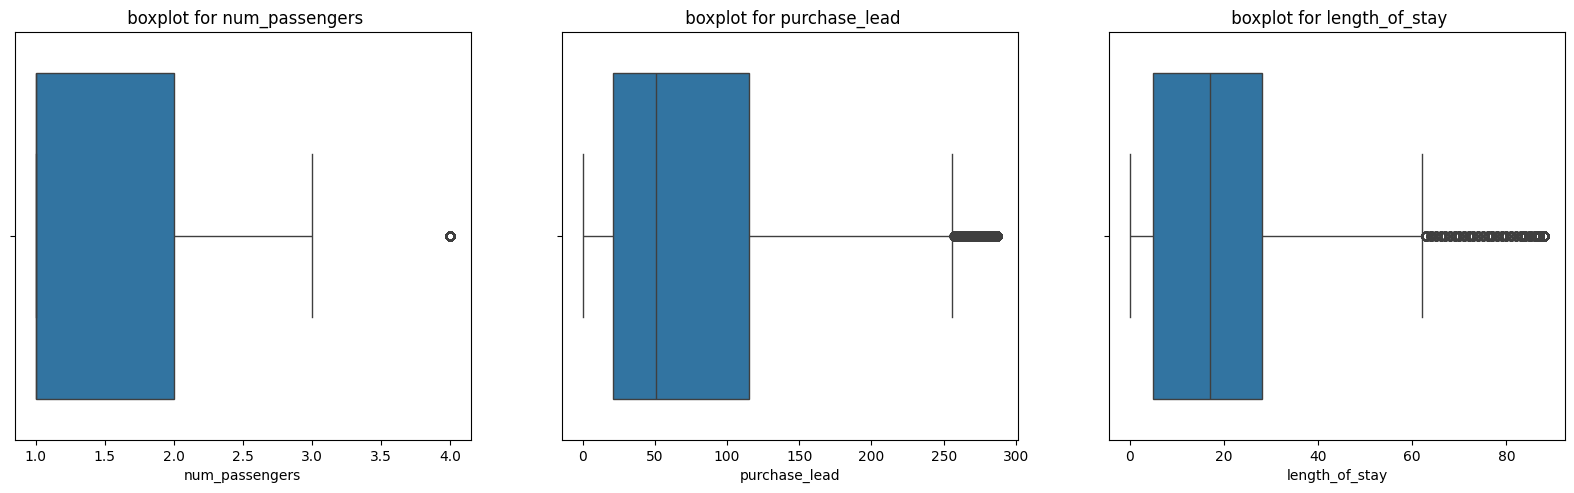

In [74]:
plt.figure(figsize=(20,18))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[col[i]])
    plt.title(f' boxplot for {col[i]}')
plt.show()

# Encode the categorical column

In [76]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in cat_col:
    df[i]=lb.fit_transform(df[i])

In [77]:
df.dtypes

num_passengers           float64
sales_channel              int32
trip_type                  int32
purchase_lead            float64
length_of_stay           float64
flight_hour                int64
flight_day                 int32
route                      int32
booking_origin             int32
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

# select the independent and dependent variable

In [79]:
x=df.drop('num_passengers',axis=1)
y=df['num_passengers']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(49281, 13)
(49281,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# split the data into training and testing data

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2022,test_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9856, 13)
(39425, 13)
(9856,)
(39425,)


# Function to evaluate model performance

In [102]:
from sklearn.metrics import *
def eval_model(ypred,y_test):
    cm=confusion_matrix(ypred,y_test)
    print(cm)
    print('classification report',classification_report(ypred,y_test))
    print('Accuracy score',accuracy_score(ypred,y_test))

def mscore(model):
    Training_score=model.score(x_train,y_train)
    Testing_score=model.score(x_test,y_test)
    res=pd.DataFrame({'Training_score':Training_score,'Testing_score':Testing_score},index=[model])
    return res
    

# Create a ML model

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_split=15, n_estimators=80)

# predict on the basis of model

In [90]:
ypred=rf.predict(x_test)
ypred

array([1., 1., 1., ..., 2., 1., 1.])

# check the model performance

In [95]:
eval_model(ypred,y_test)

[[23187  7980  1678  1489]
 [ 1527  2119   629   816]
 [    0     0     0     0]
 [    0     0     0     0]]
classification report               precision    recall  f1-score   support

         1.0       0.94      0.68      0.79     34334
         2.0       0.21      0.42      0.28      5091
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.64     39425
   macro avg       0.29      0.27      0.27     39425
weighted avg       0.84      0.64      0.72     39425

Accuracy score 0.6418769816106531


In [103]:
mscore(rf)

Training_score  \
(DecisionTreeClassifier(max_depth=12, max_featu...        0.711952   

                                                    Testing_score  
(DecisionTreeClassifier(max_depth=12, max_featu...       0.641877

# save the model

In [104]:
import pickle

In [105]:
pickle.dump(rf,open('rf_customer_booking_model.pkl','wb'))